In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D
from keras.layers import LSTM

In [2]:
df = pd.read_csv('UNSW_NB15_training-set.csv')

In [3]:
df.shape

(175341, 45)

In [4]:
# Drop unwanted columns
df.drop(['id', 'proto', 'service', 'state'], axis=1, inplace=True)

# Encode categorical variables
cat_cols = ['attack_cat']
encoder = LabelEncoder()
for col in cat_cols:
    df[col] = encoder.fit_transform(df[col])

# Standardize numerical variables
num_cols = ['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm']
scaler = StandardScaler()
for col in num_cols:
    df[col] = scaler.fit_transform(df[[col]])

In [5]:
df.shape

(175341, 41)

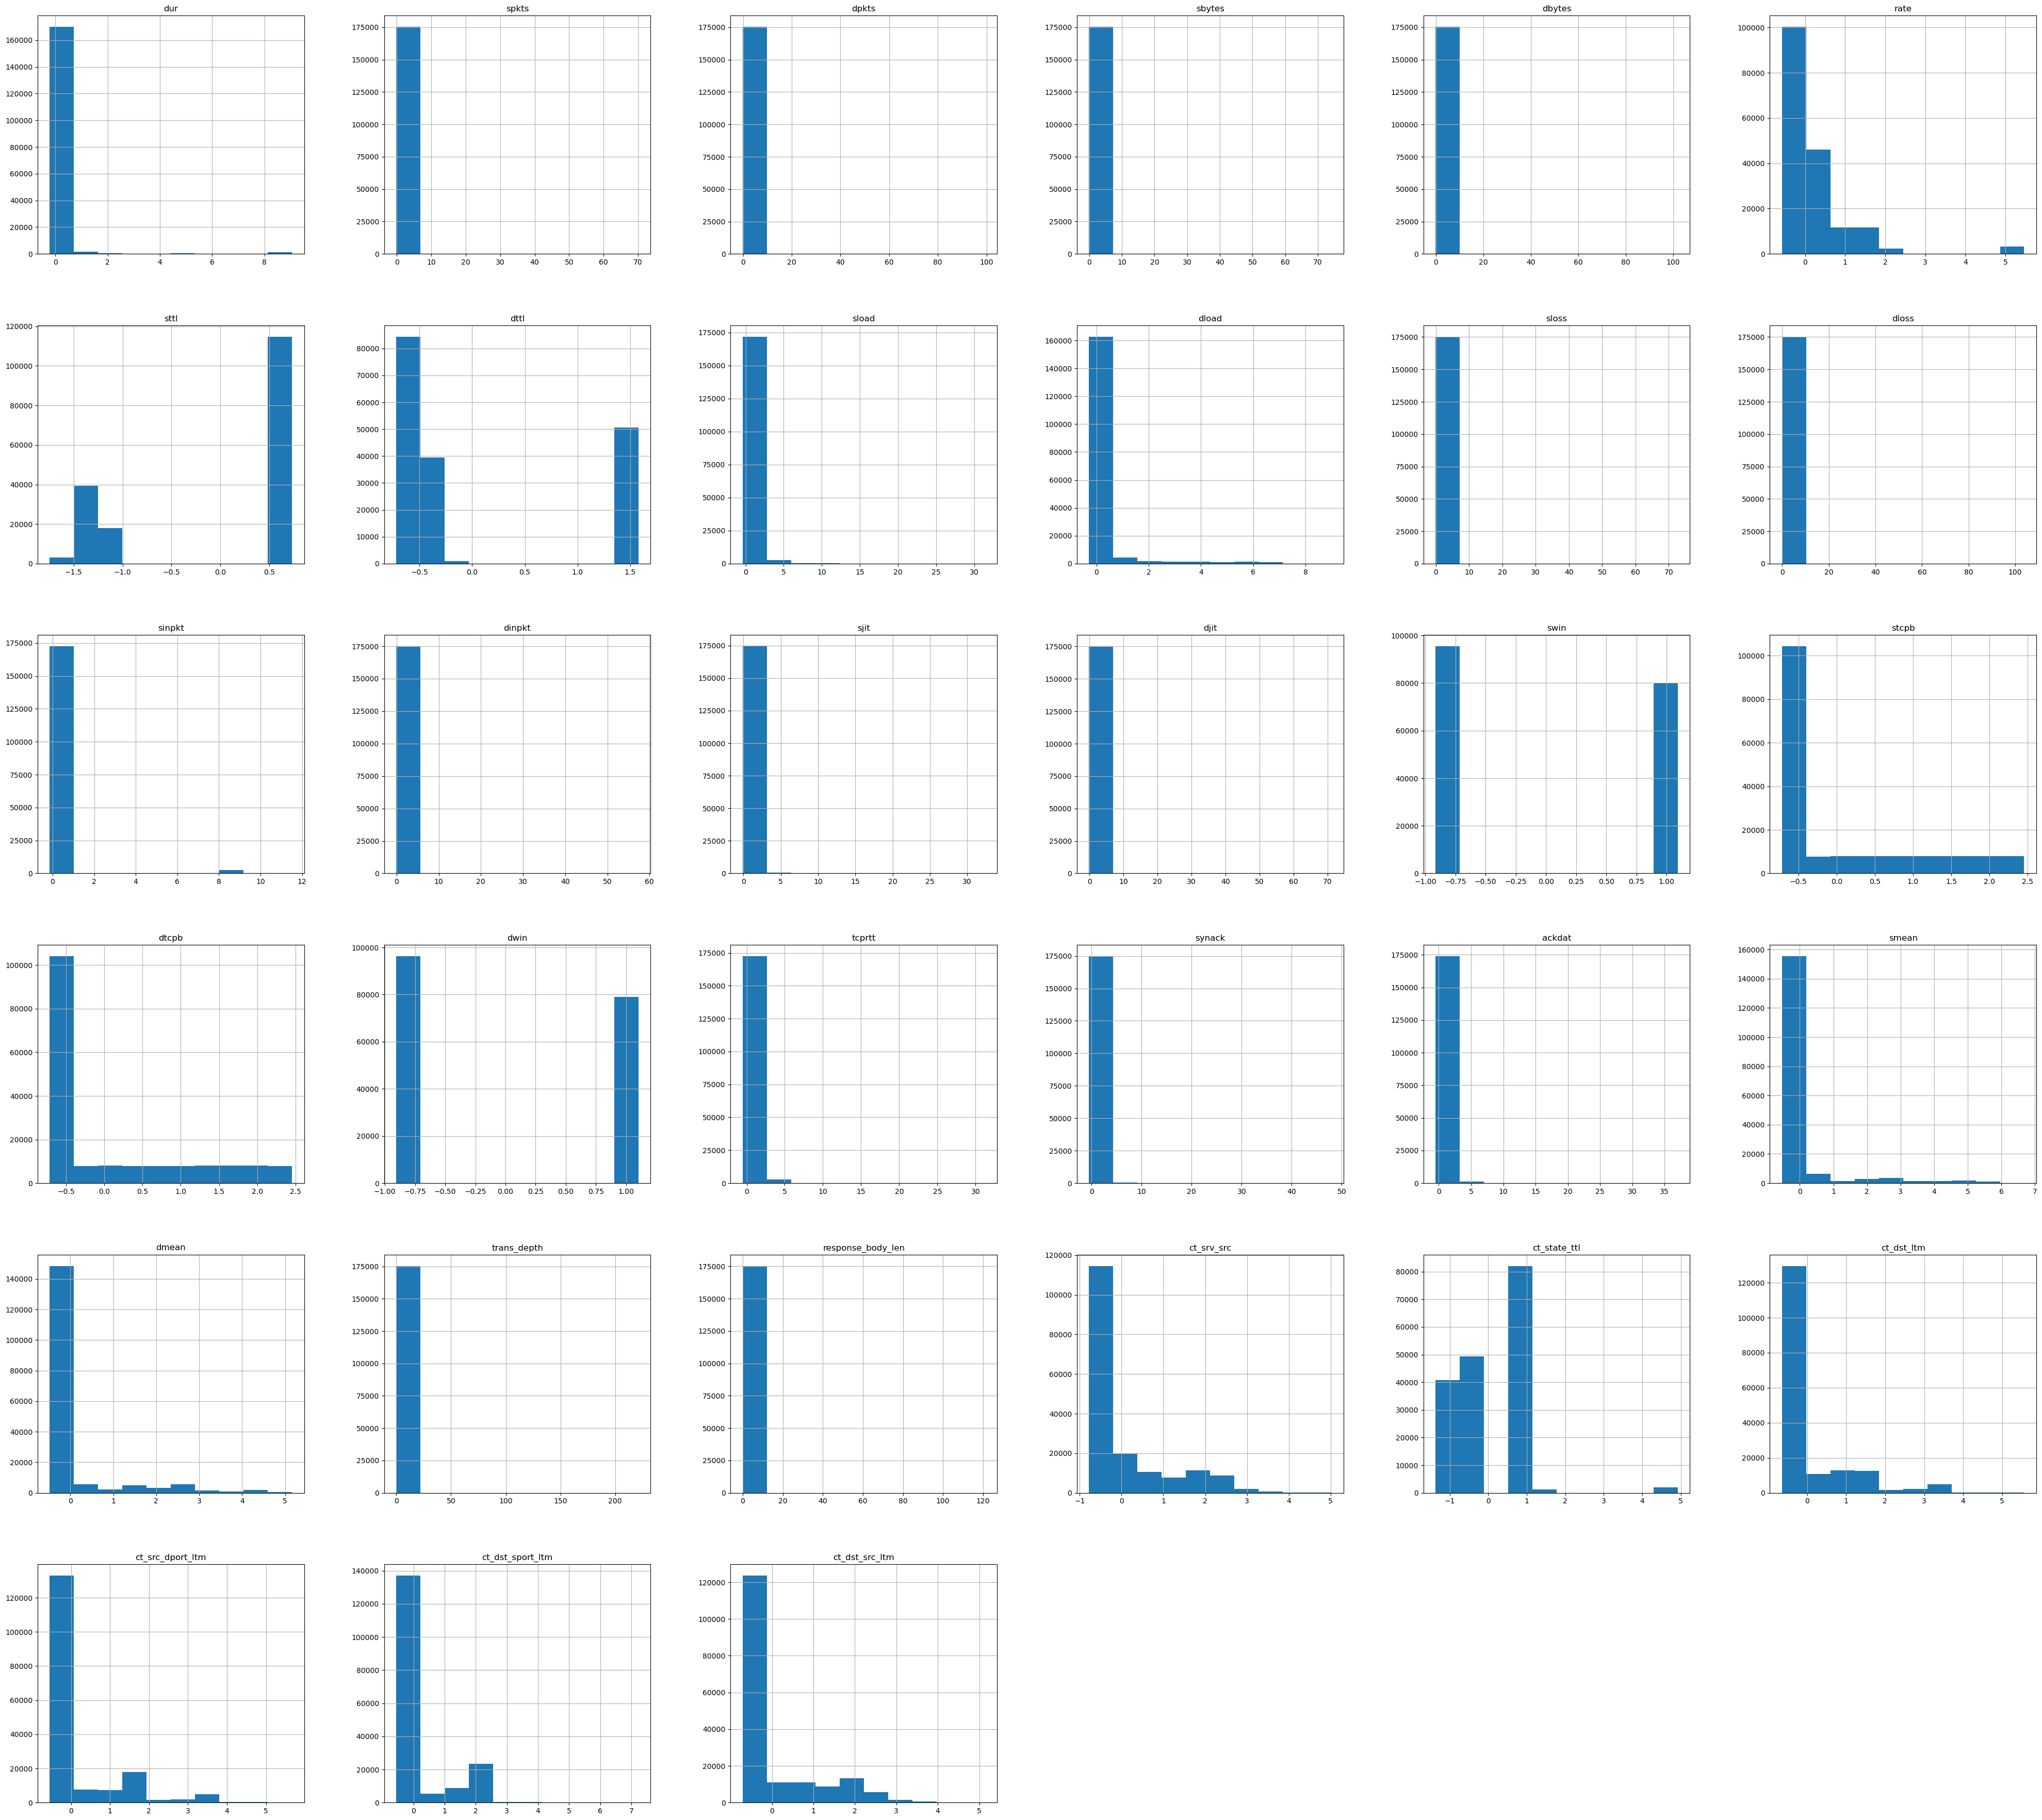

In [6]:
# Histograms of numerical variables
df[num_cols].hist(figsize=(50, 45))
plt.show()

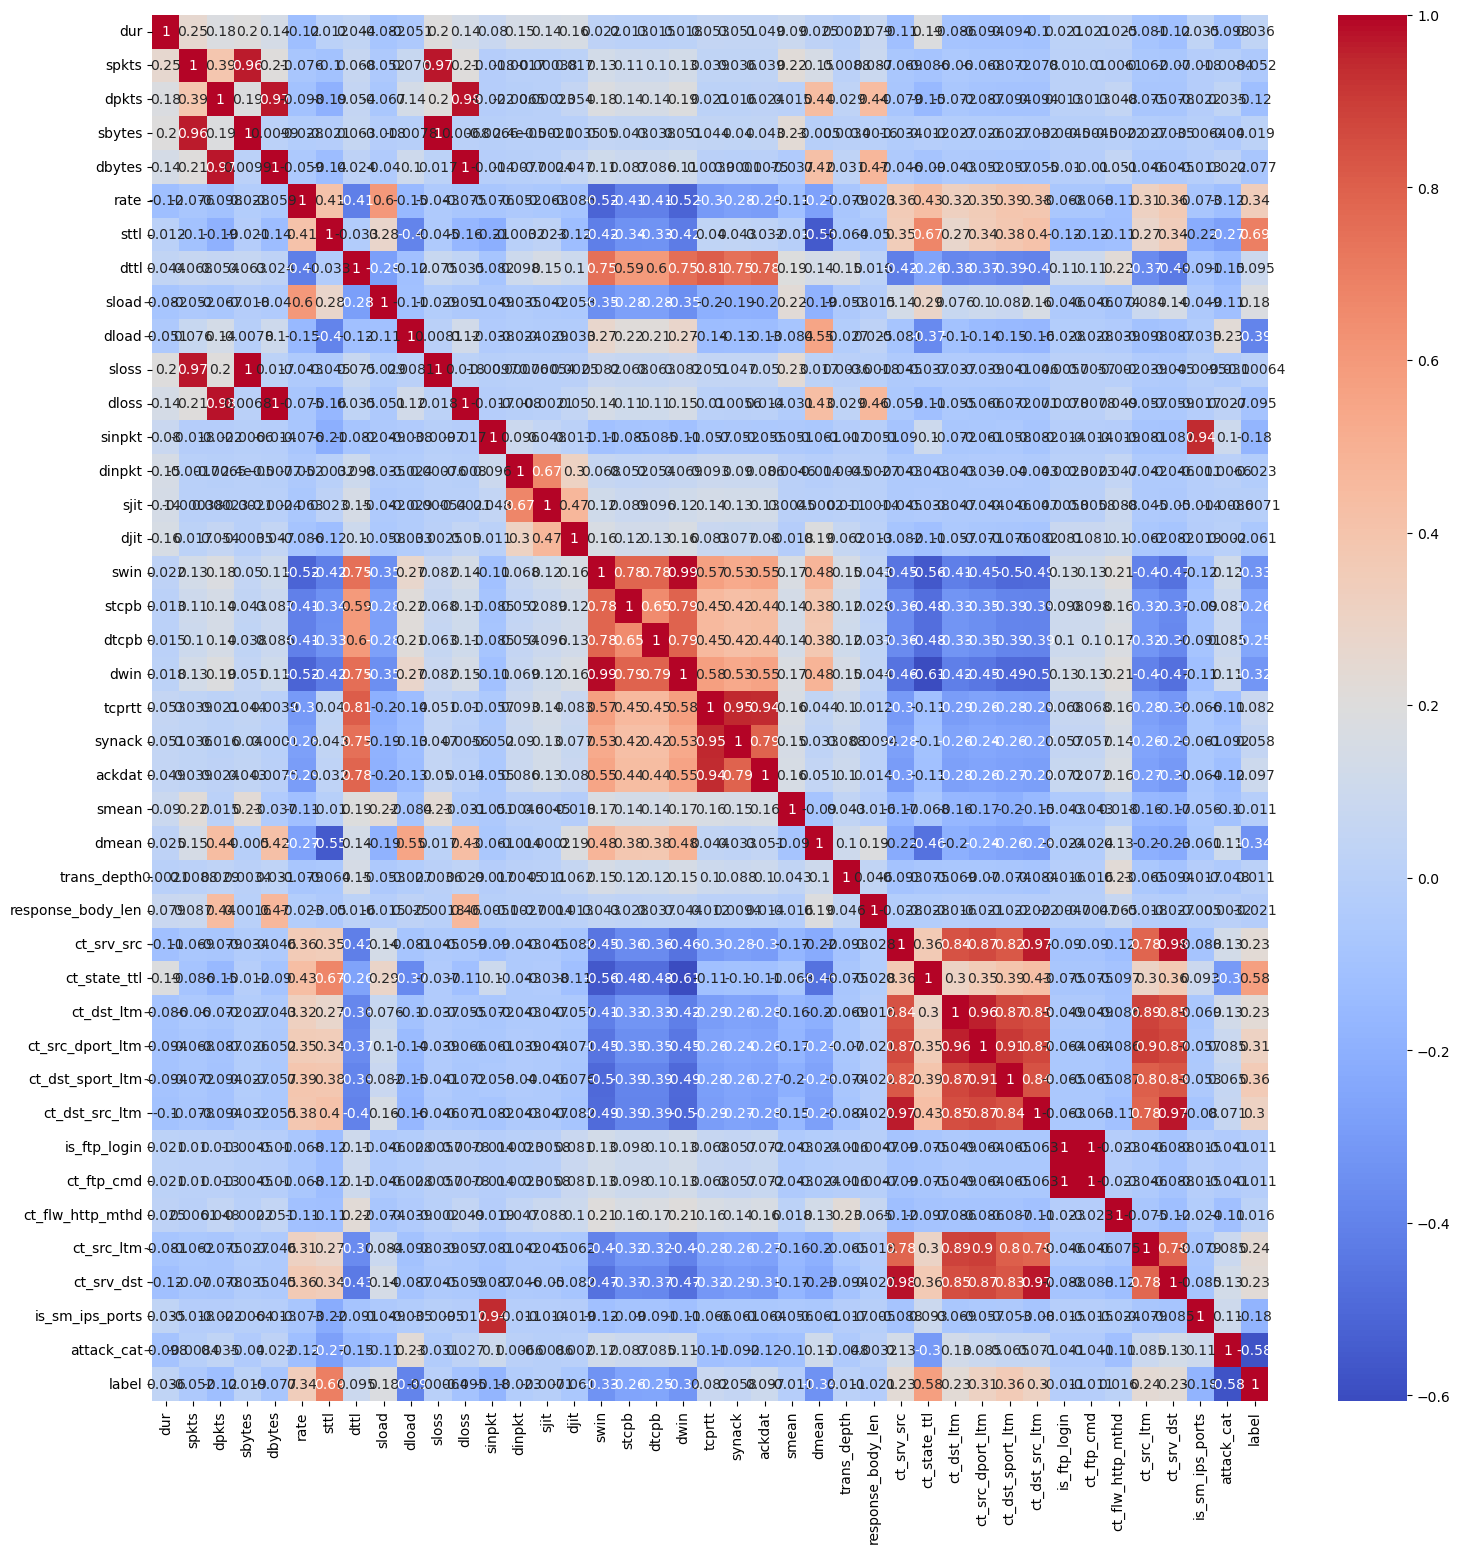

In [7]:
# Heatmap of correlation matrix
corr = df.corr()
plt.figure(figsize=(18, 18))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

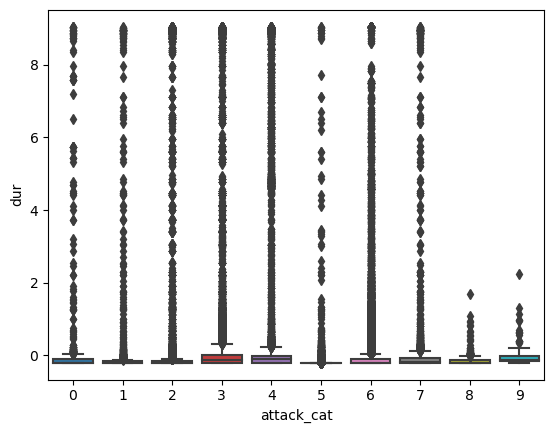

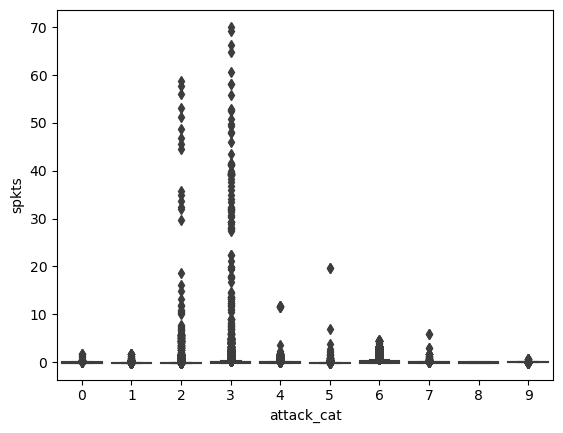

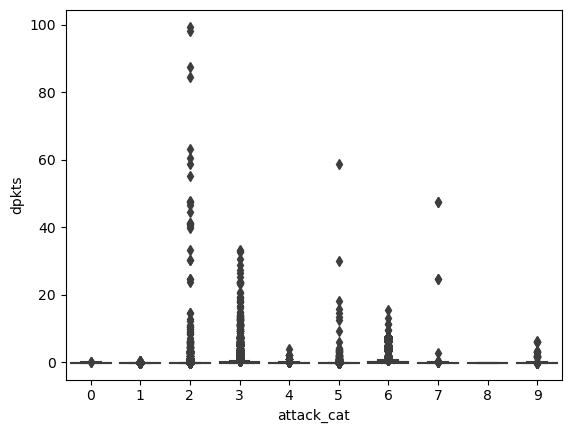

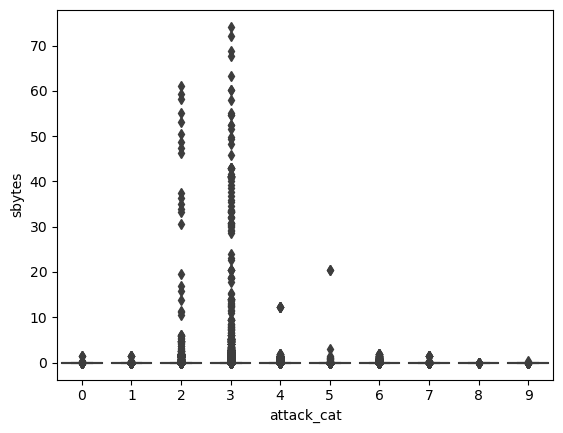

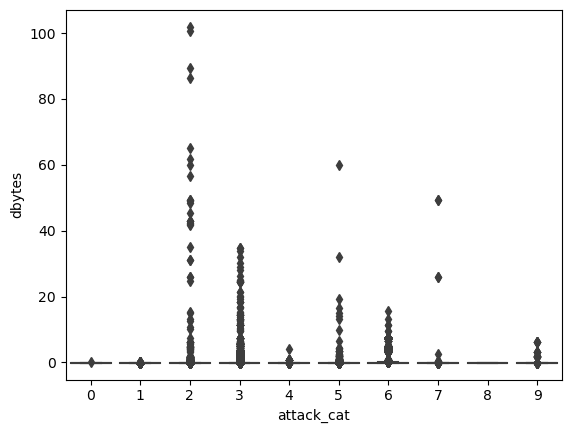

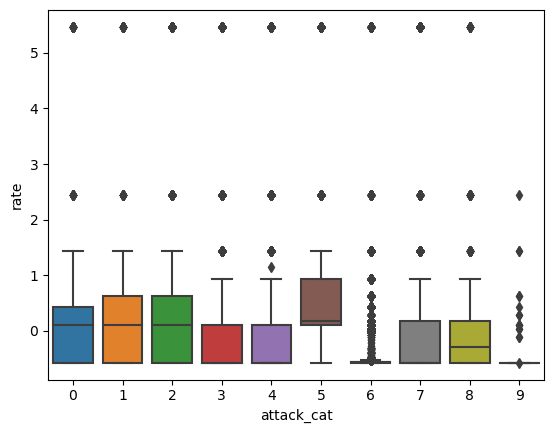

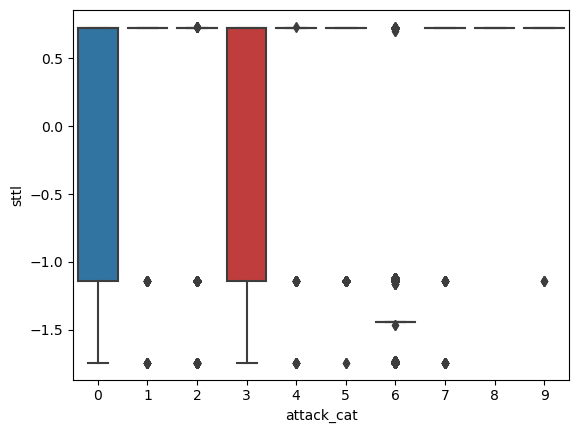

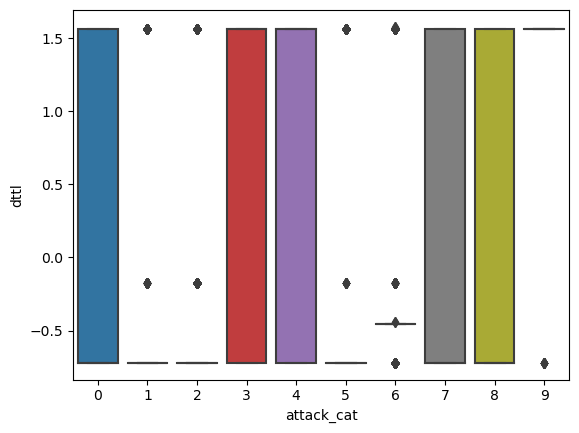

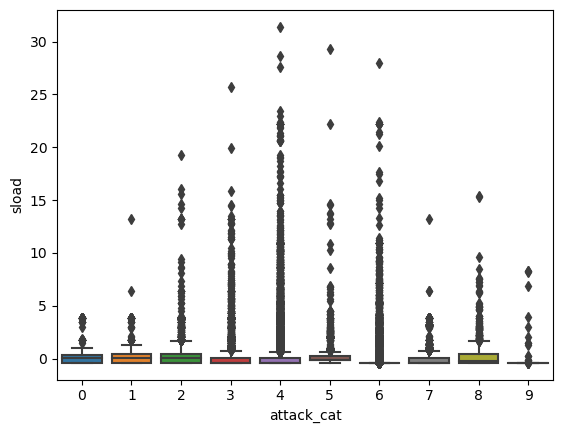

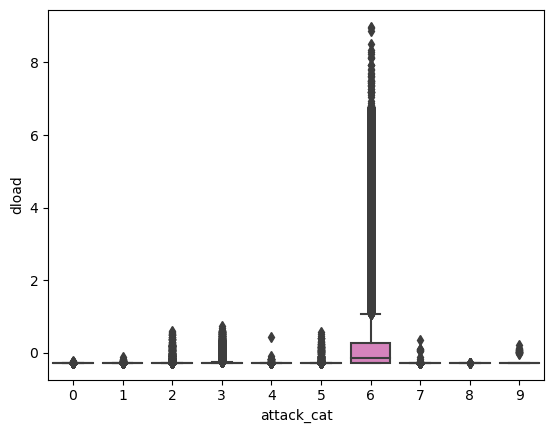

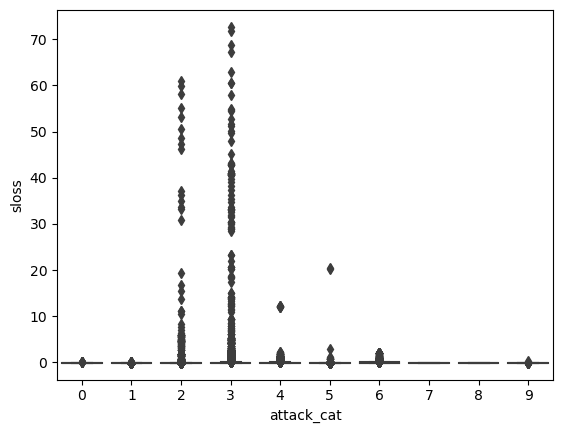

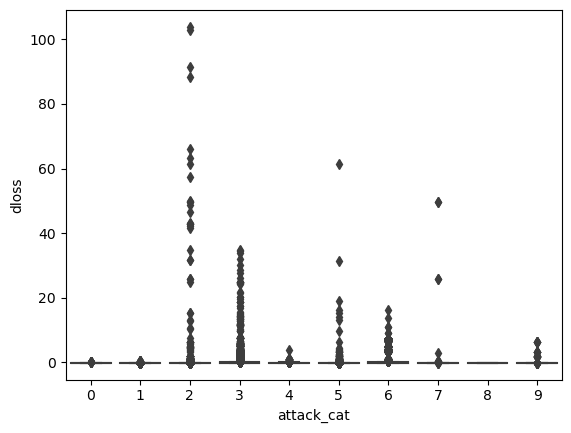

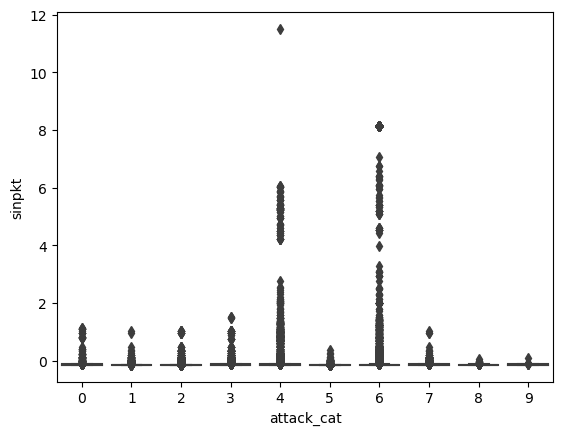

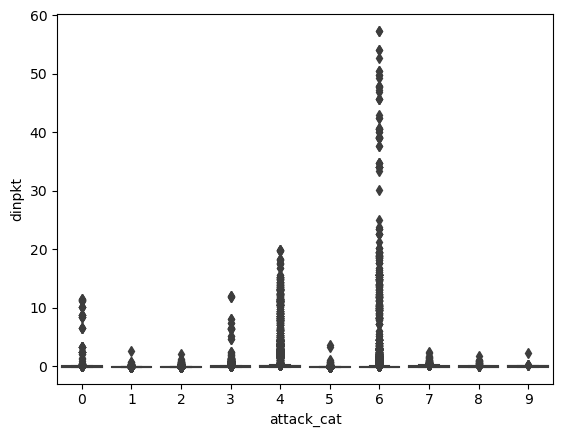

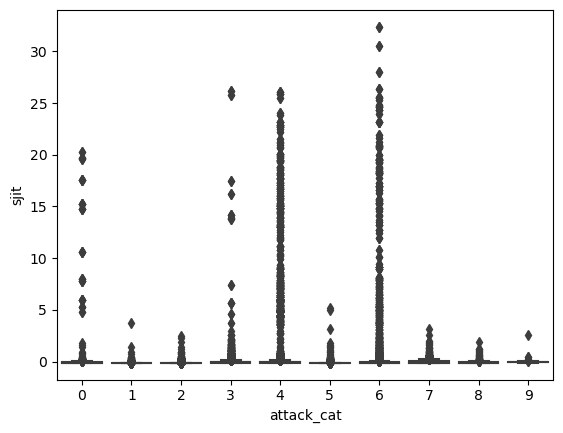

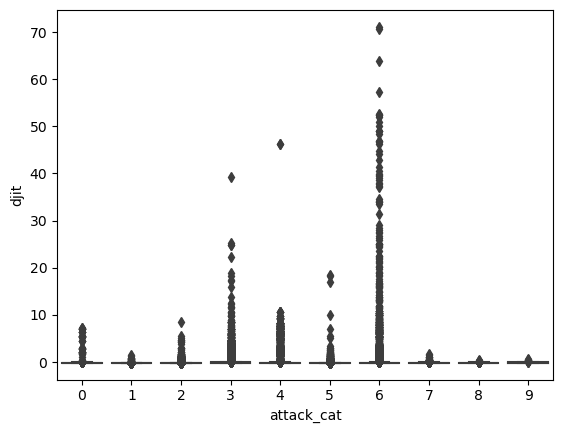

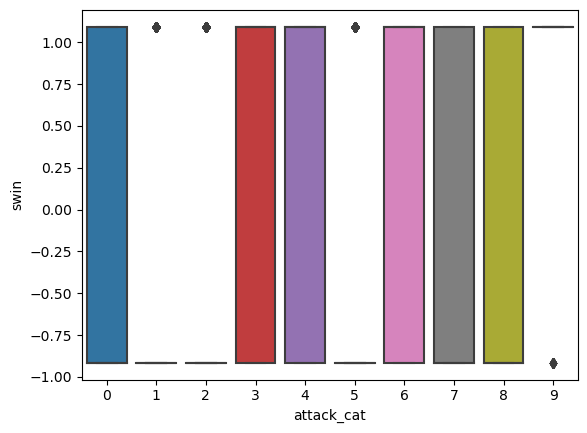

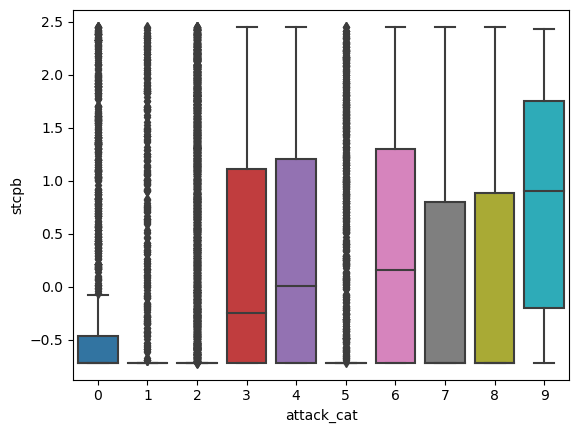

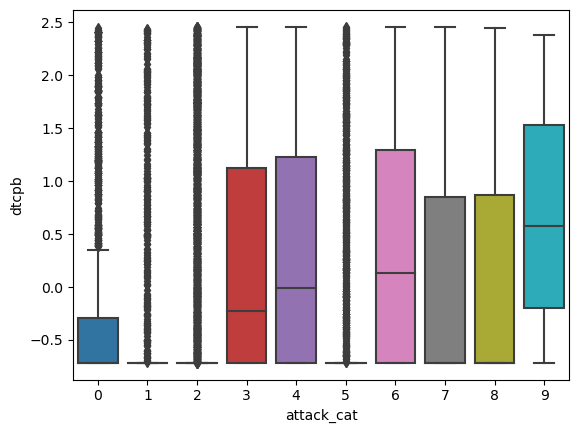

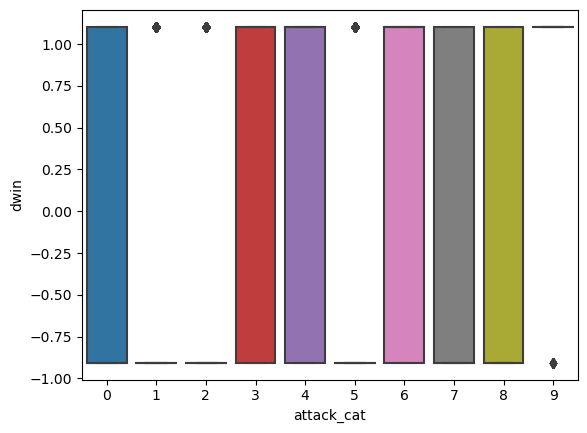

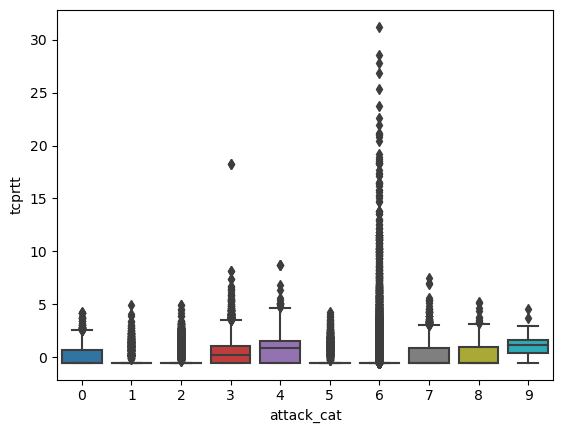

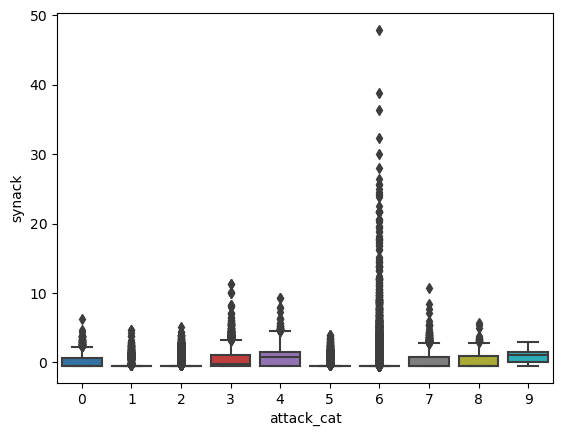

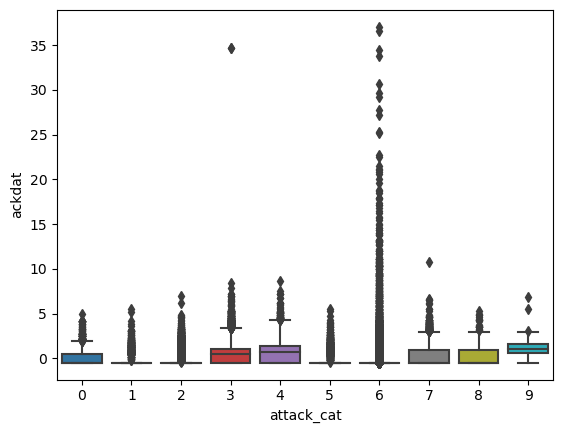

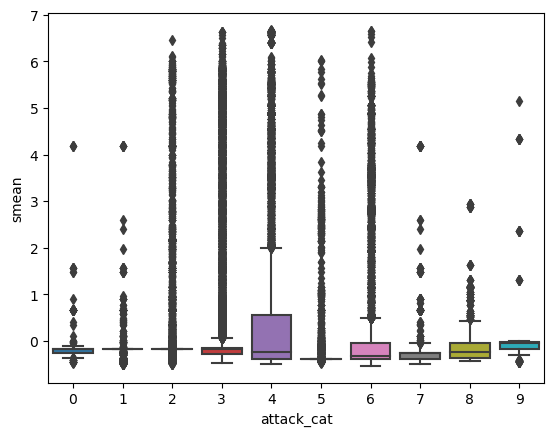

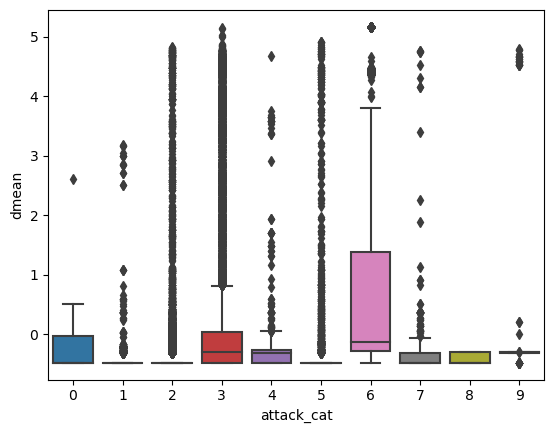

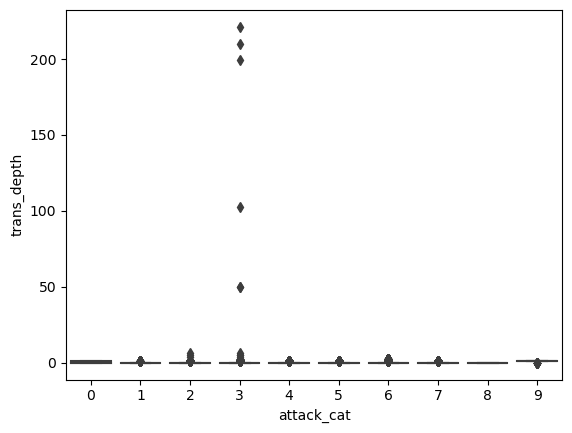

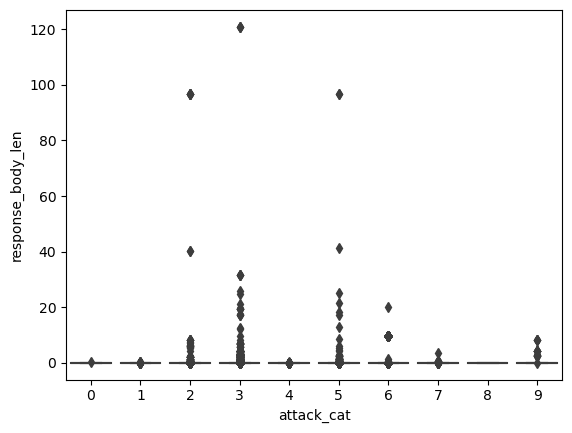

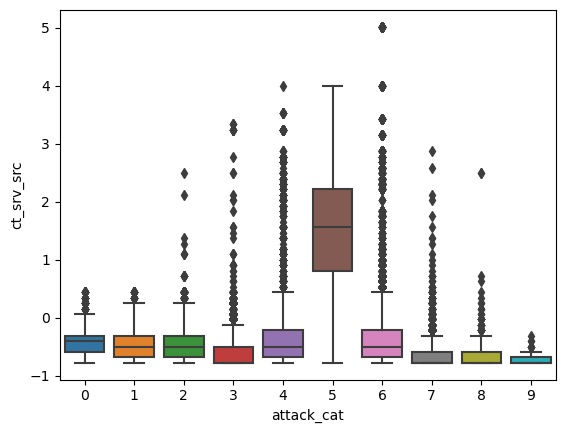

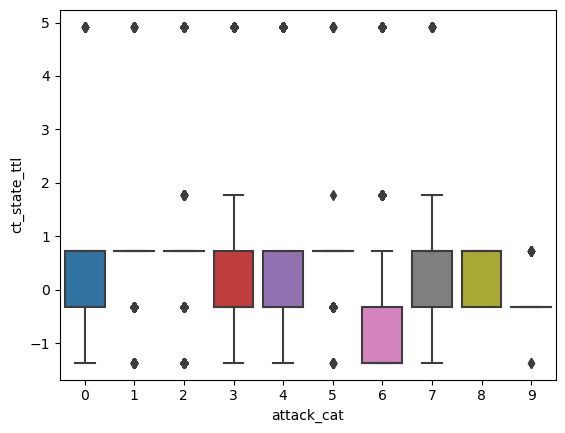

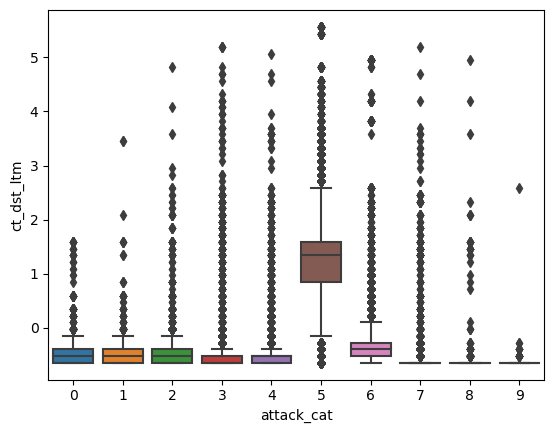

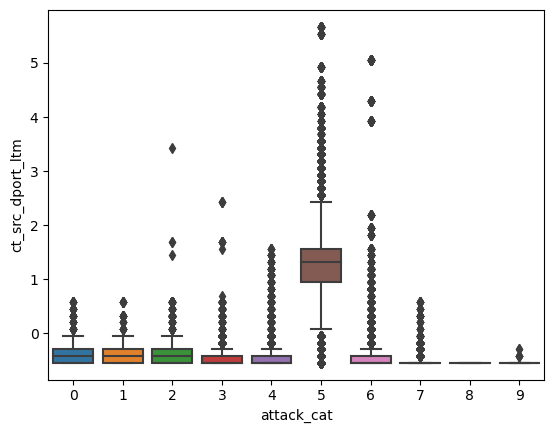

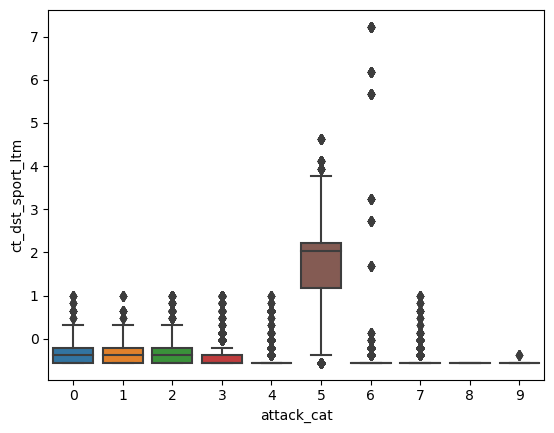

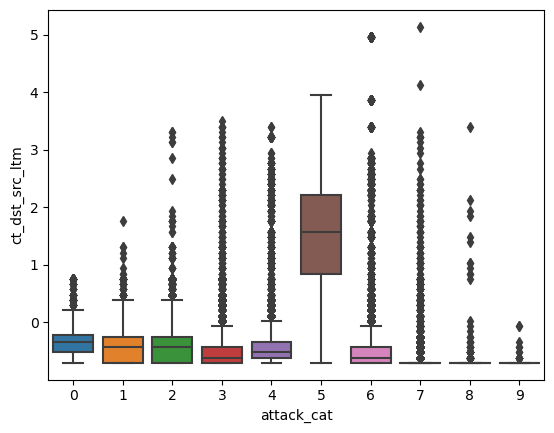

In [8]:
# Box plots of numerical variables
for col in num_cols:
    sns.boxplot(x='attack_cat', y=col, data=df)
    plt.show()
    print('\n')

In [9]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

X = df.drop(['label'], axis=1)
y = df['label']

# Select features using mutual information score
selector = SelectKBest(mutual_info_classif, k=10)
selector.fit(X, y)

# Get the selected features
selected_features = X.columns[selector.get_support(indices=True)]
X = X[selected_features]

# Supervised Learning Models

## Logistic Regression Model

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Train a logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print('Logistic Regression Accuracy:', accuracy_score(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.8963747314791932


## Confusion Matrix For Logistic Regression Model

C:\Users\aksha\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


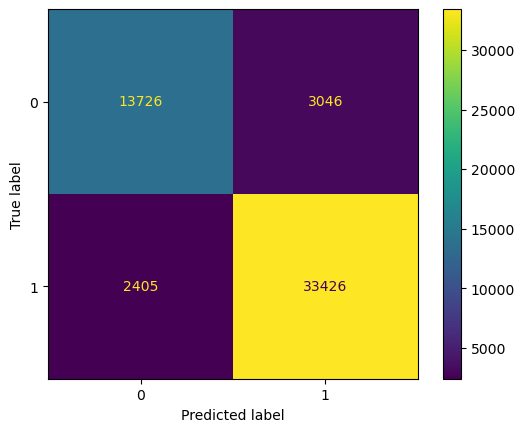

In [11]:
import warnings
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import plot_confusion_matrix

#Plot the confusion matrix for each model
plot_confusion_matrix(lr, X_test, y_test)

## ROC Curve for logistic regression model

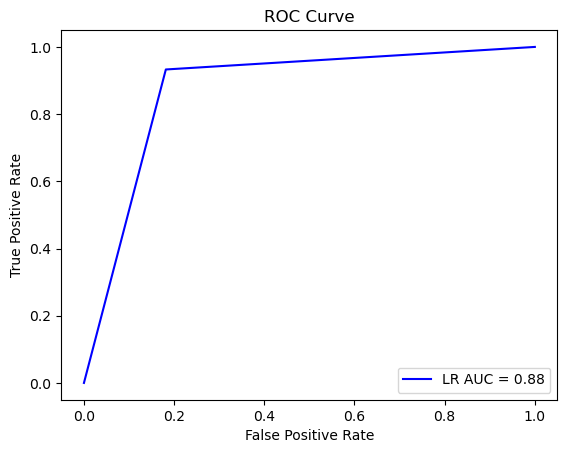

In [12]:
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)



plt.plot(fpr_lr, tpr_lr, 'b', label = 'LR AUC = %0.2f' % roc_auc_lr)

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

## Precision Recall- Curve for Logistic Regression Model

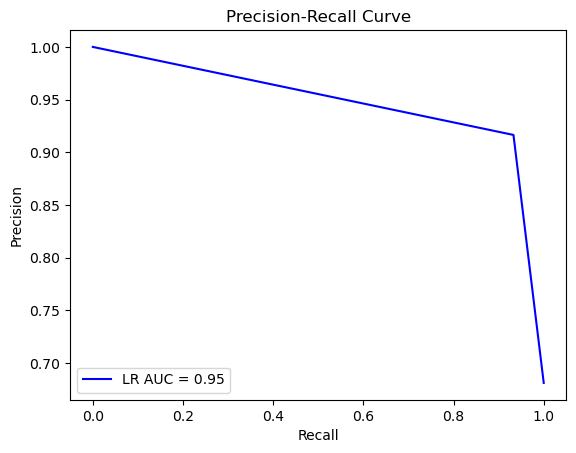

In [13]:
#Plot Precision-Recall curve for each model
precision_lr, recall_lr, thresholds_lr = precision_recall_curve(y_test, y_pred_lr)
pr_auc_lr = auc(recall_lr, precision_lr)


plt.plot(recall_lr, precision_lr, 'b', label = 'LR AUC = %0.2f' % pr_auc_lr)

plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc = 'lower left')
plt.show()

## Classification report for Logistic Regression Model

In [14]:
# Print classification report for each model
print('Logistic Regression Classification Report:')
print(classification_report(y_test, y_pred_lr))



Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.82      0.83     16772
           1       0.92      0.93      0.92     35831

    accuracy                           0.90     52603
   macro avg       0.88      0.88      0.88     52603
weighted avg       0.90      0.90      0.90     52603



C:\Users\aksha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


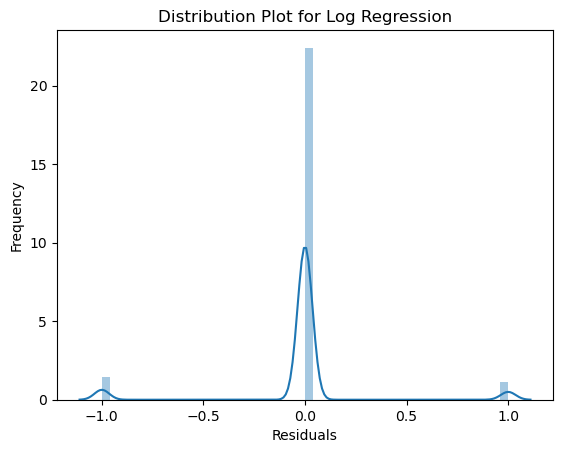

In [15]:
sns.distplot(y_test - y_pred_lr)
plt.title('Distribution Plot for Log Regression')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

## Decision Tree Model

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Train a decision tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)


print('Decision Tree Accuracy:', accuracy_score(y_test, y_pred_dt))


Decision Tree Accuracy: 1.0


In [ ]:
print('Number of leaves:', dt.get_n_leaves())
print('Depth of the tree:', dt.get_depth())


Number of leaves: 3
Depth of the tree: 2


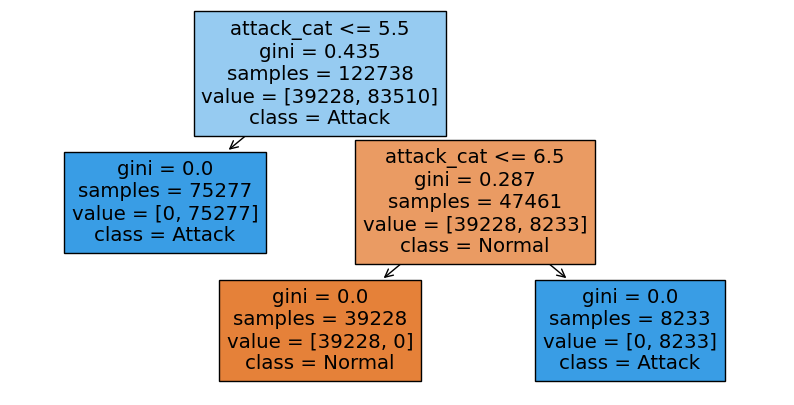

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10,5))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=['Normal', 'Attack'])
plt.show()


## Confusion Matrix For Decision Tree Model

C:\Users\aksha\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


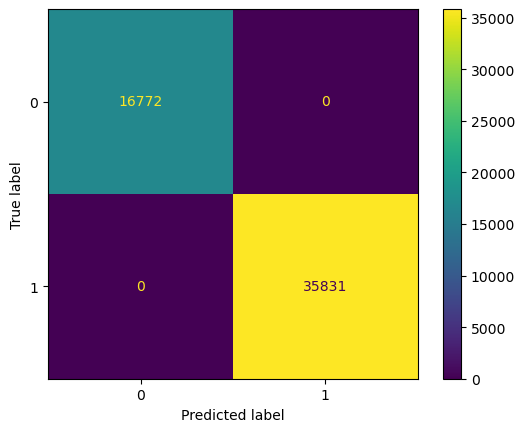

In [17]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dt, X_test, y_test)

## ROC Curve for Decision Tree Model

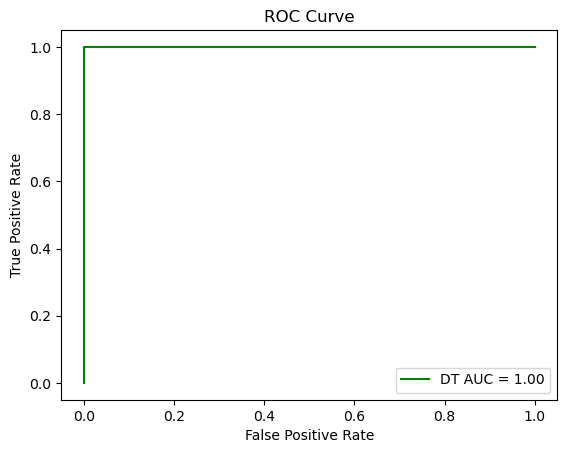

In [18]:


fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)


plt.plot(fpr_dt, tpr_dt, 'g', label = 'DT AUC = %0.2f' % roc_auc_dt)

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

## Precision Recall- Curve for Decision Tree Model

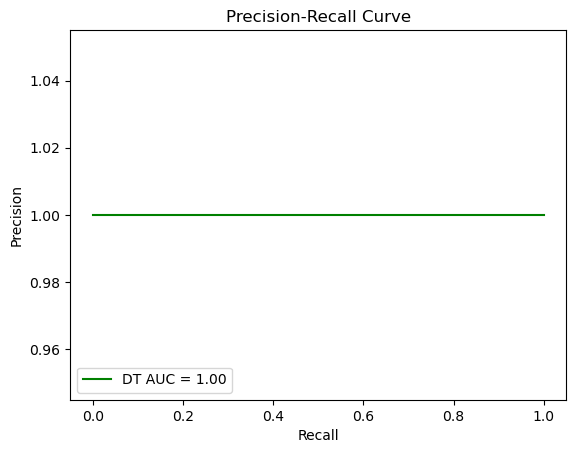

In [19]:
#Plot Precision-Recall curve for each model


precision_dt, recall_dt, thresholds_dt = precision_recall_curve(y_test, y_pred_dt)
pr_auc_dt = auc(recall_dt, precision_dt)


plt.plot(recall_dt, precision_dt, 'g', label = 'DT AUC = %0.2f' % pr_auc_dt)


plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc = 'lower left')
plt.show()

## Classification Report for Decision Tree Model

In [20]:
# Print classification report for each model

print('Decision Tree Classification Report:')
print(classification_report(y_test, y_pred_dt))



Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16772
           1       1.00      1.00      1.00     35831

    accuracy                           1.00     52603
   macro avg       1.00      1.00      1.00     52603
weighted avg       1.00      1.00      1.00     52603




## Random Forest Model

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#Train a random forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


print('Random Forest Accuracy:', accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 1.0


In [ ]:
# Accessing the decision trees in the random forest
estimators = rf.estimators_

# Getting the information of the model architecture 
tree = estimators[0]
n_nodes = tree.tree_.node_count
children_left = tree.tree_.children_left
children_right = tree.tree_.children_right
feature = tree.tree_.feature
threshold = tree.tree_.threshold

print("Model architecture of the first decision tree:")
print("Number of nodes = {}".format(n_nodes))
print("Indices of left children = {}".format(children_left))
print("Indices of right children = {}".format(children_right))
print("Indices of split features = {}".format(feature))
print("Threshold values for each node = {}".format(threshold))


Model architecture of the first decision tree:
Number of nodes = 17
Indices of left children = [ 1 -1  3  4  5  6  7 -1 -1 -1 11 -1 -1 -1 15 -1 -1]
Indices of right children = [ 2 -1 14 13 10  9  8 -1 -1 -1 12 -1 -1 -1 16 -1 -1]
Indices of split features = [ 9 -2  4  6  5  3  7 -2 -2 -2  9 -2 -2 -2  9 -2 -2]
Threshold values for each node = [ 5.5        -2.         -0.19960222 -0.38988368  0.55101199 -0.57681897
 -0.4091904  -2.         -2.         -2.          6.5        -2.
 -2.         -2.          6.5        -2.         -2.        ]


In [ ]:
for i, tree in enumerate(rf.estimators_):
    print(f"Tree {i+1}:")
    print(f"Max depth: {tree.tree_.max_depth}")
    print(f"Number of leaves: {tree.tree_.n_leaves}")
    print()

Tree 1:
Max depth: 6
Number of leaves: 9

Tree 2:
Max depth: 6
Number of leaves: 16

Tree 3:
Max depth: 10
Number of leaves: 43

Tree 4:
Max depth: 19
Number of leaves: 212

Tree 5:
Max depth: 4
Number of leaves: 7

Tree 6:
Max depth: 16
Number of leaves: 102

Tree 7:
Max depth: 18
Number of leaves: 110

Tree 8:
Max depth: 20
Number of leaves: 114

Tree 9:
Max depth: 13
Number of leaves: 71

Tree 10:
Max depth: 5
Number of leaves: 13

Tree 11:
Max depth: 20
Number of leaves: 198

Tree 12:
Max depth: 21
Number of leaves: 201

Tree 13:
Max depth: 21
Number of leaves: 234

Tree 14:
Max depth: 7
Number of leaves: 17

Tree 15:
Max depth: 17
Number of leaves: 78

Tree 16:
Max depth: 15
Number of leaves: 124

Tree 17:
Max depth: 15
Number of leaves: 64

Tree 18:
Max depth: 4
Number of leaves: 7

Tree 19:
Max depth: 3
Number of leaves: 5

Tree 20:
Max depth: 13
Number of leaves: 65

Tree 21:
Max depth: 17
Number of leaves: 143

Tree 22:
Max depth: 9
Number of leaves: 25

Tree 23:
Max depth: 12

[Text(0.4375, 0.9, 'X[9] <= 5.5\ngini = 0.435\nsamples = 77666\nvalue = [39268, 83470]'),
 Text(0.375, 0.7, 'gini = 0.0\nsamples = 47553\nvalue = [0, 75181]'),
 Text(0.5, 0.7, 'X[6] <= -0.112\ngini = 0.288\nsamples = 30113\nvalue = [39268, 8289]'),
 Text(0.25, 0.5, 'X[4] <= -0.2\ngini = 0.192\nsamples = 26724\nvalue = [37673, 4534]'),
 Text(0.125, 0.3, 'X[9] <= 6.5\ngini = 0.003\nsamples = 19936\nvalue = [31518, 54]'),
 Text(0.0625, 0.1, 'gini = 0.0\nsamples = 19904\nvalue = [31518, 0]'),
 Text(0.1875, 0.1, 'gini = 0.0\nsamples = 32\nvalue = [0, 54]'),
 Text(0.375, 0.3, 'X[2] <= -0.101\ngini = 0.488\nsamples = 6788\nvalue = [6155, 4480]'),
 Text(0.3125, 0.1, 'gini = 0.5\nsamples = 5714\nvalue = [4522, 4436]'),
 Text(0.4375, 0.1, 'gini = 0.051\nsamples = 1074\nvalue = [1633, 44]'),
 Text(0.75, 0.5, 'X[1] <= -0.046\ngini = 0.418\nsamples = 3389\nvalue = [1595, 3755]'),
 Text(0.625, 0.3, 'X[9] <= 6.5\ngini = 0.285\nsamples = 2830\nvalue = [773, 3726]'),
 Text(0.5625, 0.1, 'gini = 0.0\nsam

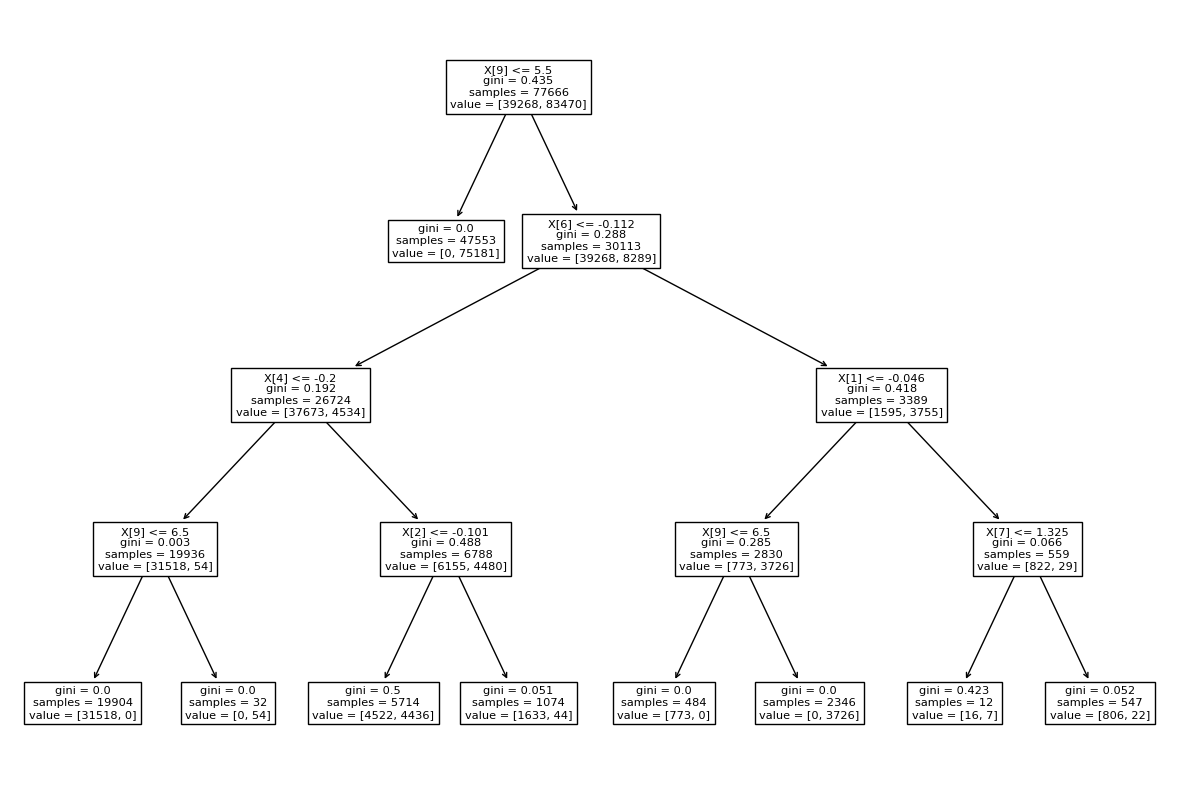

In [22]:
from sklearn.tree import plot_tree
tree = RandomForestClassifier(max_depth=4, n_estimators=150)
tree.fit(X_train, y_train)
fig = plt.figure(figsize=(15, 10))
plot_tree(tree.estimators_[0])

## Confusion Matrix for Random Forest Model

C:\Users\aksha\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


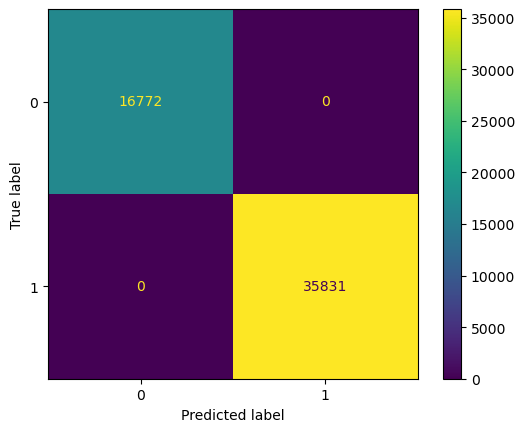

In [23]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf, X_test, y_test)

## ROC Curve For Random Forest Model

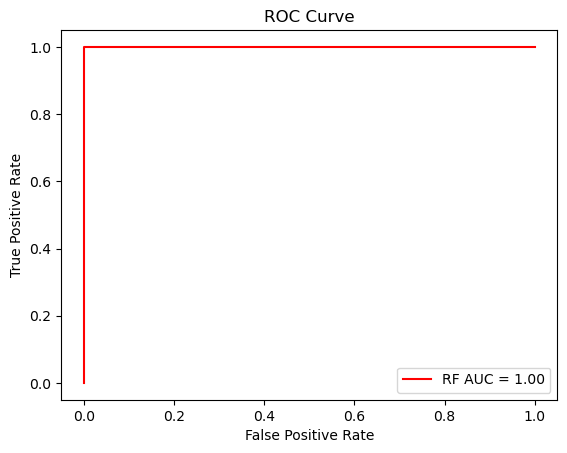

In [24]:


fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)


plt.plot(fpr_rf, tpr_rf, 'r', label = 'RF AUC = %0.2f' % roc_auc_rf)

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

## Precision Recall- Curve For Random Forest Model

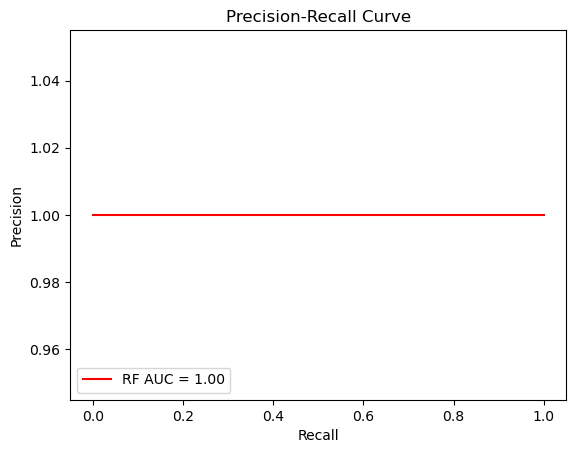

In [25]:
#Plot Precision-Recall curve for each model


precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, y_pred_rf)
pr_auc_rf = auc(recall_rf, precision_rf)


plt.plot(recall_rf, precision_rf, 'r', label = 'RF AUC = %0.2f' % pr_auc_rf)


plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc = 'lower left')
plt.show()

## Classification Report For Random Forest Model

In [26]:
# Print classification report for each model

print('Random Forest Classification Report:')
print(classification_report(y_test, y_pred_rf))



Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16772
           1       1.00      1.00      1.00     35831

    accuracy                           1.00     52603
   macro avg       1.00      1.00      1.00     52603
weighted avg       1.00      1.00      1.00     52603



## Support Vector Machine Model

In [27]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


#Train a support vector machine model
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)


print('SVM Accuracy:', accuracy_score(y_test, y_pred_svm))


SVM Accuracy: 0.9997148451609223


## Confusion Matrix for Support Vector Machine Model

C:\Users\aksha\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


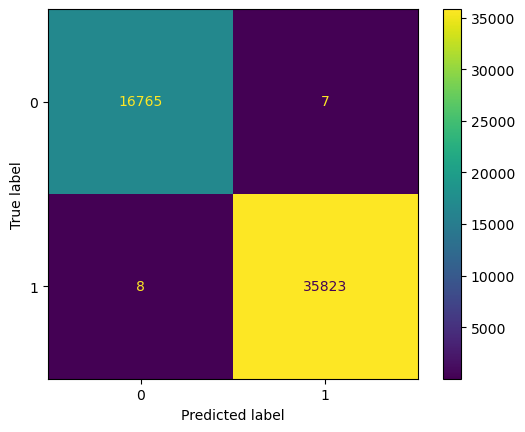

In [28]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svm, X_test, y_test)

## ROC Curve for Support Vector Machine Model

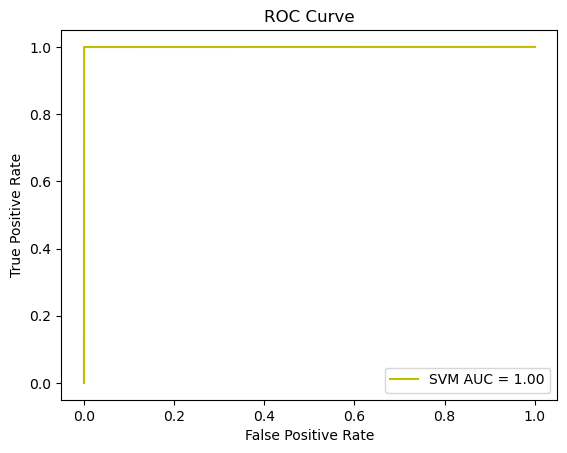

In [29]:


fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)




plt.plot(fpr_svm, tpr_svm, 'y', label = 'SVM AUC = %0.2f' % roc_auc_svm)

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

## Precision Recall- Curve for Support Vector Machine Model

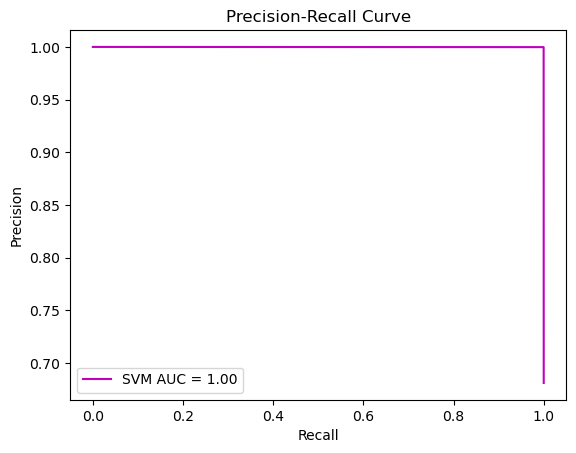

In [30]:


precision_svm, recall_svm, thresholds_svm = precision_recall_curve(y_test, y_pred_svm)
pr_auc_svm = auc(recall_svm, precision_svm)


plt.plot(recall_svm, precision_svm, 'm', label = 'SVM AUC = %0.2f' % pr_auc_svm)


plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc = 'lower left')
plt.show()

## Classification Report for Support Vector Machine Model

In [31]:
# Print classification report for each model


print('SVM Classification Report:')
print(classification_report(y_test, y_pred_svm))



SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16772
           1       1.00      1.00      1.00     35831

    accuracy                           1.00     52603
   macro avg       1.00      1.00      1.00     52603
weighted avg       1.00      1.00      1.00     52603



## XGBoost Model

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Train an XGBoost model
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

#Evaluate the models

print('XGBoost Accuracy:', accuracy_score(y_test, y_pred_xgb))

XGBoost Accuracy: 1.0


## Confusion Matrix for XGBoost Model

C:\Users\aksha\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


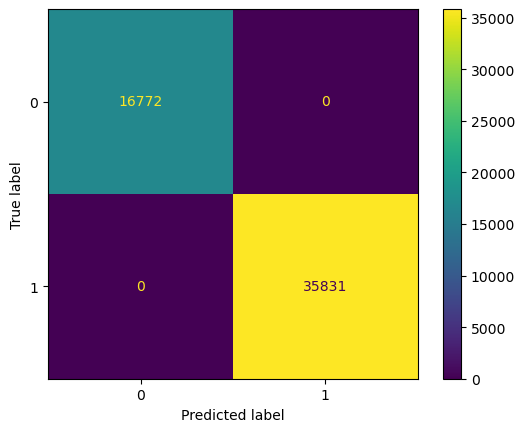

In [33]:

from sklearn.metrics import plot_confusion_matrix
#plot_confusion_matrix(cnn, X_test.values.reshape(-1, X_test.shape[1], 1), y_test)
#plot_confusion_matrix(rcnn, X_test.values.reshape(-1, X_test.shape[1], 1), y_test)
plot_confusion_matrix(xgb, X_test, y_test)

## ROC Curve for XGBoost Model

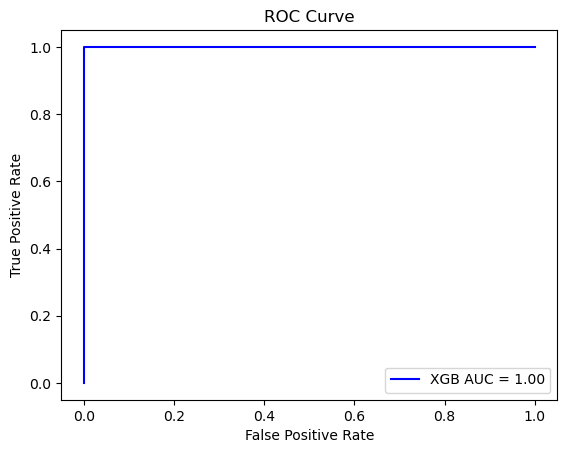

In [34]:


fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_pred_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)


plt.plot(fpr_xgb, tpr_xgb, 'b', label = 'XGB AUC = %0.2f' % roc_auc_xgb)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

## Precision Recall- Curve for XGBoost Model

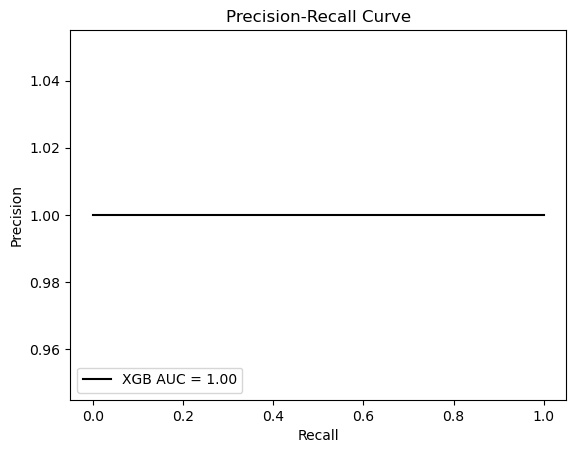

In [35]:

precision_xgb, recall_xgb, thresholds_xgb = precision_recall_curve(y_test, y_pred_xgb)
pr_auc_xgb = auc(recall_xgb, precision_xgb)


plt.plot(recall_xgb, precision_xgb, 'k', label = 'XGB AUC = %0.2f' % pr_auc_xgb)

plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc = 'lower left')
plt.show()

## Classification Report for XGBoost Model 

In [36]:
# Print classification report for each model

print('XGBoost Classification Report:')
print(classification_report(y_test, y_pred_xgb))

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16772
           1       1.00      1.00      1.00     35831

    accuracy                           1.00     52603
   macro avg       1.00      1.00      1.00     52603
weighted avg       1.00      1.00      1.00     52603



## ROC Curve for Supervised Learning Models

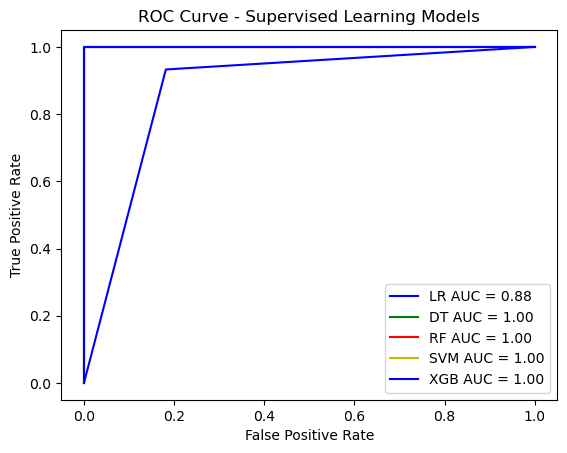

In [58]:
# ROC Curve Supervised Learning Models
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)


fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_pred_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.plot(fpr_lr, tpr_lr, 'b', label = 'LR AUC = %0.2f' % roc_auc_lr)
plt.plot(fpr_dt, tpr_dt, 'g', label = 'DT AUC = %0.2f' % roc_auc_dt)
plt.plot(fpr_rf, tpr_rf, 'r', label = 'RF AUC = %0.2f' % roc_auc_rf)
plt.plot(fpr_svm, tpr_svm, 'y', label = 'SVM AUC = %0.2f' % roc_auc_svm)
plt.plot(fpr_xgb, tpr_xgb, 'b', label = 'XGB AUC = %0.2f' % roc_auc_xgb)
plt.title('ROC Curve - Supervised Learning Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'lower right')
plt.show()


## Precision-Recall curve for Supervised Learning Models

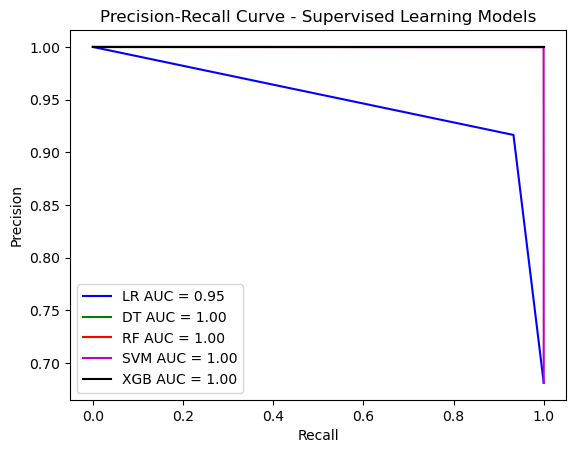

In [59]:
#Precision-Recall curve for Supervised Learning Models
precision_lr, recall_lr, thresholds_lr = precision_recall_curve(y_test, y_pred_lr)
pr_auc_lr = auc(recall_lr, precision_lr)

precision_dt, recall_dt, thresholds_dt = precision_recall_curve(y_test, y_pred_dt)
pr_auc_dt = auc(recall_dt, precision_dt)

precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, y_pred_rf)
pr_auc_rf = auc(recall_rf, precision_rf)

precision_svm, recall_svm, thresholds_svm = precision_recall_curve(y_test, y_pred_svm)
pr_auc_svm = auc(recall_svm, precision_svm)

precision_xgb, recall_xgb, thresholds_xgb = precision_recall_curve(y_test, y_pred_xgb)
pr_auc_xgb = auc(recall_xgb, precision_xgb)

plt.plot(recall_lr, precision_lr, 'b', label = 'LR AUC = %0.2f' % pr_auc_lr)
plt.plot(recall_dt, precision_dt, 'g', label = 'DT AUC = %0.2f' % pr_auc_dt)
plt.plot(recall_rf, precision_rf, 'r', label = 'RF AUC = %0.2f' % pr_auc_rf)
plt.plot(recall_svm, precision_svm, 'm', label = 'SVM AUC = %0.2f' % pr_auc_svm)
plt.plot(recall_xgb, precision_xgb, 'k', label = 'XGB AUC = %0.2f' % pr_auc_xgb)

plt.title('Precision-Recall Curve - Supervised Learning Models')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc = 'lower left')
plt.show()

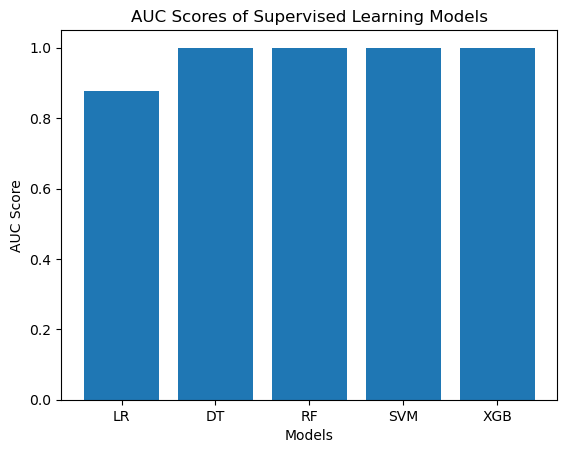

In [39]:
models = ['LR', 'DT', 'RF', 'SVM', 'XGB']
auc_scores = [roc_auc_lr, roc_auc_dt, roc_auc_rf, roc_auc_svm,  roc_auc_xgb]

plt.bar(models, auc_scores)
plt.title('AUC Scores of Supervised Learning Models')
plt.xlabel('Models')
plt.ylabel('AUC Score')
plt.show()

## Accuracy for Supervised Learning Models

In [40]:
#Accuracy for Supervised Learning Models 

print('Logistic Regression Accuracy:', accuracy_score(y_test, y_pred_lr))
print('Decision Tree Accuracy:', accuracy_score(y_test, y_pred_dt))
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred_rf))
print('SVM Accuracy:', accuracy_score(y_test, y_pred_svm))
print('XGBoost Accuracy:', accuracy_score(y_test, y_pred_xgb))

Logistic Regression Accuracy: 0.8963747314791932
Decision Tree Accuracy: 1.0
Random Forest Accuracy: 1.0
SVM Accuracy: 0.9997148451609223
XGBoost Accuracy: 1.0


# UnSupervised Learning Models

## Neural Network Model Using MLP Classifier

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


#Train a neural network model
nn = MLPClassifier()
nn.fit(X_train, y_train)
y_pred_nn = nn.predict(X_test)


print('Neural Network Accuracy:', accuracy_score(y_test, y_pred_nn))


Neural Network Accuracy: 0.9999429690321845


## Confusion Matrix for Neural Network Model

C:\Users\aksha\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


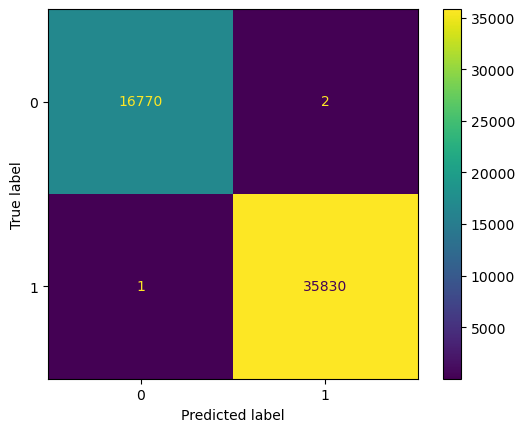

In [42]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(nn, X_test, y_test)

## ROC Curve for Neural Network Model

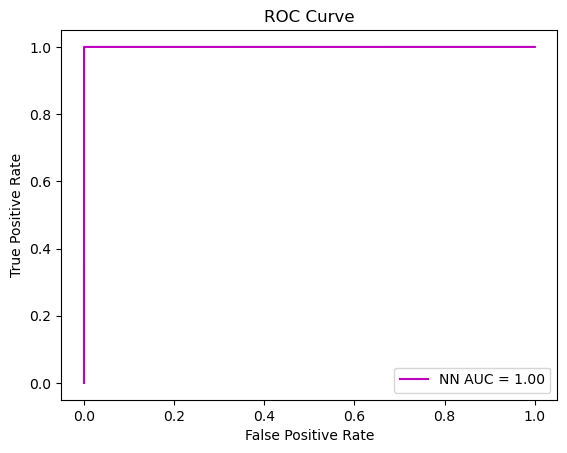

In [43]:

fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test, y_pred_nn)
roc_auc_nn = auc(fpr_nn, tpr_nn)


plt.plot(fpr_nn, tpr_nn, 'm', label = 'NN AUC = %0.2f' % roc_auc_nn)

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

## Precision Recall- Curve for Neural Network Model

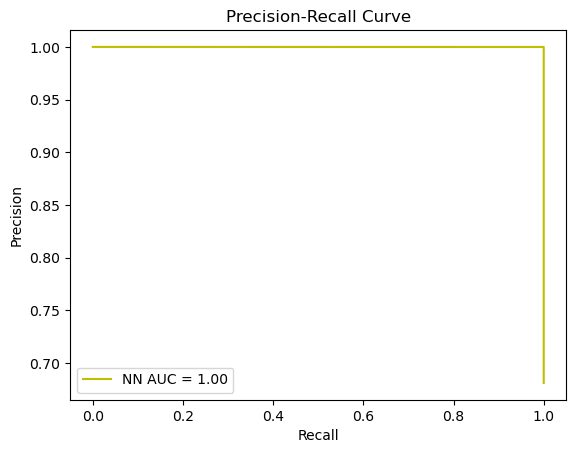

In [44]:


precision_nn, recall_nn, thresholds_nn = precision_recall_curve(y_test, y_pred_nn)
pr_auc_nn = auc(recall_nn, precision_nn)


plt.plot(recall_nn, precision_nn, 'y', label = 'NN AUC = %0.2f' % pr_auc_nn)

plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc = 'lower left')
plt.show()

## Classification Report for Neural Network Model

In [45]:
# Print classification report for each model


print('Neural Network Classification Report:')
print(classification_report(y_test, y_pred_nn))



Neural Network Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16772
           1       1.00      1.00      1.00     35831

    accuracy                           1.00     52603
   macro avg       1.00      1.00      1.00     52603
weighted avg       1.00      1.00      1.00     52603



## Convolution Neural Network Model

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


#Train a CNN model
cnn = Sequential()
cnn.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
cnn.add(MaxPooling1D(pool_size=2))
cnn.add(Flatten())
cnn.add(Dense(50, activation='relu'))
cnn.add(Dense(1, activation='sigmoid'))
cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn.fit(X_train.values.reshape(-1, X_train.shape[1], 1), y_train, epochs=10, batch_size=32)
y_pred_cnn = (cnn.predict(X_test.values.reshape(-1, X_test.shape[1], 1)) > 0.5).astype(int)


print('CNN Accuracy:', accuracy_score(y_test, y_pred_cnn))


Epoch 1/10
3836/3836 [==============================] - 3s 806us/step - loss: 0.0821 - accuracy: 0.9656
Epoch 2/10
3836/3836 [==============================] - 3s 802us/step - loss: 0.0062 - accuracy: 0.9988
Epoch 3/10
3836/3836 [==============================] - 3s 800us/step - loss: 0.0023 - accuracy: 0.9995
Epoch 4/10
3836/3836 [==============================] - 3s 803us/step - loss: 0.0015 - accuracy: 0.9998
Epoch 5/10
3836/3836 [==============================] - 4s 946us/step - loss: 0.0016 - accuracy: 0.9997
Epoch 6/10
3836/3836 [==============================] - 3s 844us/step - loss: 8.8447e-04 - accuracy: 0.9998
Epoch 7/10
3836/3836 [==============================] - 3s 814us/step - loss: 9.4265e-04 - accuracy: 0.9998
Epoch 8/10
3836/3836 [==============================] - 3s 776us/step - loss: 5.0764e-04 - accuracy: 1.0000
Epoch 9/10
3836/3836 [==============================] - 3s 899us/step - loss: 8.6530e-04 - accuracy: 0.9999
Epoch 10/10
1644/1644 [=========================

## ROC Curve for Convolution Neural Network Model

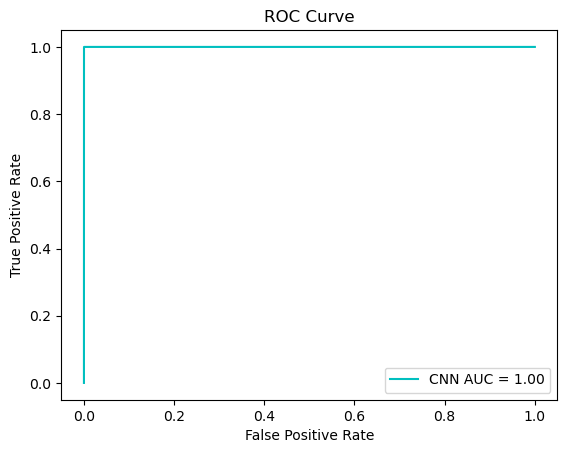

In [47]:


fpr_cnn, tpr_cnn, thresholds_cnn = roc_curve(y_test, y_pred_cnn)
roc_auc_cnn = auc(fpr_cnn, tpr_cnn)


plt.plot(fpr_cnn, tpr_cnn, 'c', label = 'CNN AUC = %0.2f' % roc_auc_cnn)

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

## Precision Recall- Curve for Convolution Neural Network Model

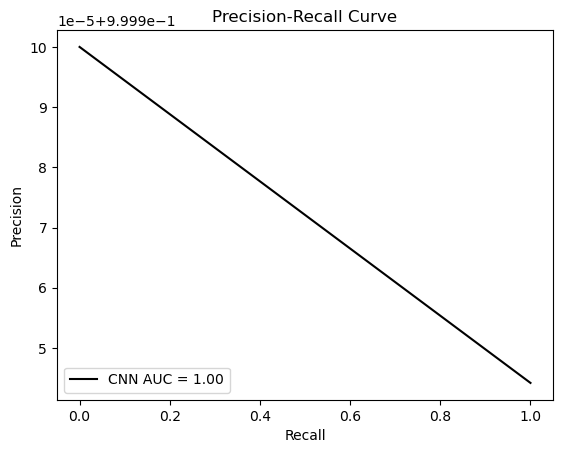

In [48]:


precision_cnn, recall_cnn, thresholds_cnn = precision_recall_curve(y_test, y_pred_cnn)
pr_auc_cnn = auc(recall_cnn, precision_cnn)


plt.plot(recall_cnn, precision_cnn, 'k', label = 'CNN AUC = %0.2f' % pr_auc_cnn)


plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc = 'lower left')
plt.show()

## Classification report for Convolution Neural Network Model

In [49]:
# Print classification report for each model


print('CNN Classification Report:')
print(classification_report(y_test, y_pred_cnn))



CNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16772
           1       1.00      1.00      1.00     35831

    accuracy                           1.00     52603
   macro avg       1.00      1.00      1.00     52603
weighted avg       1.00      1.00      1.00     52603



## RCNN Model

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Train a RCNN model
rcnn = Sequential()
rcnn.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
rcnn.add(MaxPooling1D(pool_size=2))
rcnn.add(LSTM(100))
rcnn.add(Dense(1, activation='sigmoid'))
rcnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
rcnn.fit(X_train.values.reshape(-1, X_train.shape[1], 1), y_train, epochs=10, batch_size=32)
y_pred_rcnn = (rcnn.predict(X_test.values.reshape(-1, X_test.shape[1], 1)) > 0.5).astype(int)


print('RCNN Accuracy:', accuracy_score(y_test, y_pred_rcnn))

Epoch 1/10
3836/3836 [==============================] - 11s 3ms/step - loss: 0.0593 - accuracy: 0.9750
Epoch 2/10
3836/3836 [==============================] - 10s 3ms/step - loss: 0.0010 - accuracy: 0.9999
Epoch 3/10
3836/3836 [==============================] - 11s 3ms/step - loss: 4.4064e-04 - accuracy: 0.9999
Epoch 4/10
3836/3836 [==============================] - 10s 3ms/step - loss: 1.6045e-04 - accuracy: 1.0000
Epoch 5/10
3836/3836 [==============================] - 9s 2ms/step - loss: 2.2650e-04 - accuracy: 1.0000
Epoch 6/10
3836/3836 [==============================] - 11s 3ms/step - loss: 3.2892e-04 - accuracy: 0.9999
Epoch 7/10
3836/3836 [==============================] - 11s 3ms/step - loss: 1.0892e-04 - accuracy: 1.0000
Epoch 8/10
3836/3836 [==============================] - 10s 3ms/step - loss: 7.0792e-06 - accuracy: 1.0000
Epoch 9/10
3836/3836 [==============================] - 10s 3ms/step - loss: 2.1011e-04 - accuracy: 0.9999
Epoch 10/10
1644/1644 [=======================

## ROC Curve for RCNN model

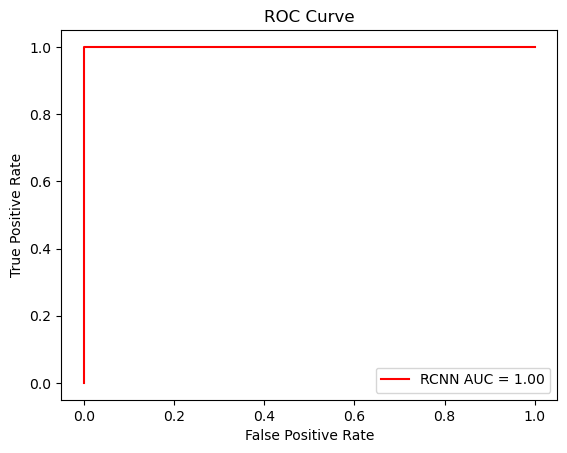

In [51]:

fpr_rcnn, tpr_rcnn, thresholds_rcnn = roc_curve(y_test, y_pred_rcnn)
roc_auc_rcnn = auc(fpr_rcnn, tpr_rcnn)


plt.plot(fpr_rcnn, tpr_rcnn, 'r', label = 'RCNN AUC = %0.2f' % roc_auc_rcnn)

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

## Precision Recall- Curve for RCNN model

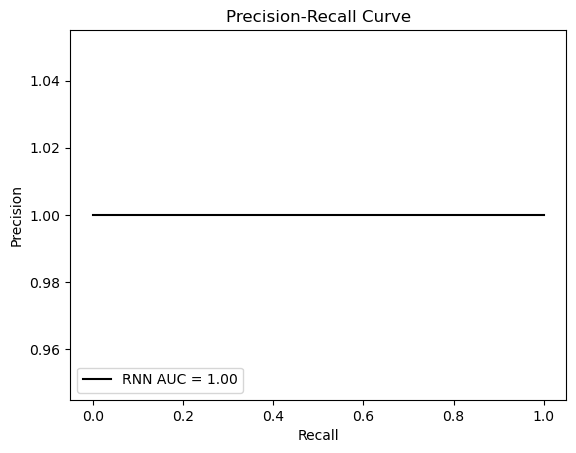

In [52]:


precision_rcnn, recall_rcnn, thresholds_rcnn = precision_recall_curve(y_test, y_pred_rcnn)
pr_auc_rcnn = auc(recall_rcnn, precision_rcnn)


plt.plot(recall_rcnn, precision_rcnn, 'k', label = 'RNN AUC = %0.2f' % pr_auc_rcnn)


plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc = 'lower left')
plt.show()

## Classification report for RCNN model

In [53]:
# Print classification report for each model

print('RCNN Classification Report:')
print(classification_report(y_test, y_pred_rcnn))



RCNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16772
           1       1.00      1.00      1.00     35831

    accuracy                           1.00     52603
   macro avg       1.00      1.00      1.00     52603
weighted avg       1.00      1.00      1.00     52603



## ROC Curve for Unsupervised Learning Models

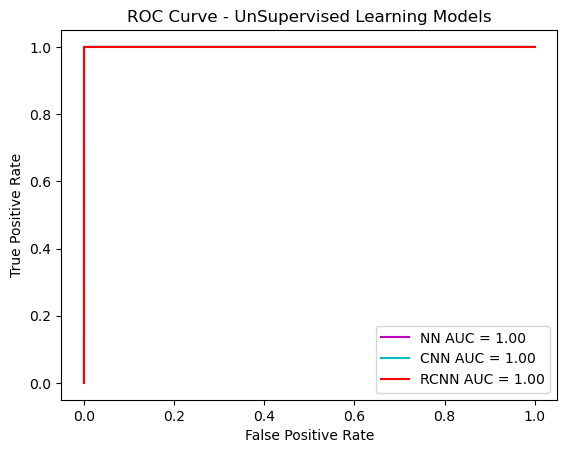

In [60]:
# ROC Curve Unsupervised Learning Models

fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test, y_pred_nn)
roc_auc_nn = auc(fpr_nn, tpr_nn)

fpr_cnn, tpr_cnn, thresholds_cnn = roc_curve(y_test, y_pred_cnn)
roc_auc_cnn = auc(fpr_cnn, tpr_cnn)

fpr_rcnn, tpr_rcnn, thresholds_rcnn = roc_curve(y_test, y_pred_rcnn)
roc_auc_rcnn = auc(fpr_rcnn, tpr_rcnn)

plt.plot(fpr_nn, tpr_nn, 'm', label = 'NN AUC = %0.2f' % roc_auc_nn)
plt.plot(fpr_cnn, tpr_cnn, 'c', label = 'CNN AUC = %0.2f' % roc_auc_cnn)
plt.plot(fpr_rcnn, tpr_rcnn, 'r', label = 'RCNN AUC = %0.2f' % roc_auc_rcnn)
plt.title('ROC Curve - UnSupervised Learning Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'lower right')
plt.show()


## Precision-Recall curve for Unsupervised Learning Models

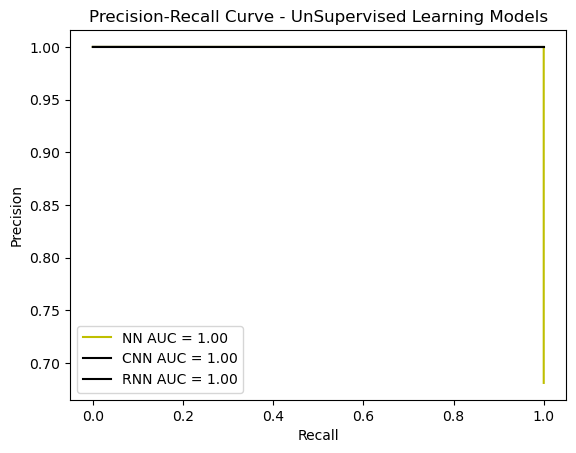

In [61]:
#Plot Precision-Recall curve for Unsupervised Learning Models

precision_nn, recall_nn, thresholds_nn = precision_recall_curve(y_test, y_pred_nn)
pr_auc_nn = auc(recall_nn, precision_nn)

precision_cnn, recall_cnn, thresholds_cnn = precision_recall_curve(y_test, y_pred_cnn)
pr_auc_cnn = auc(recall_cnn, precision_cnn)

precision_rcnn, recall_rcnn, thresholds_rcnn = precision_recall_curve(y_test, y_pred_rcnn)
pr_auc_rcnn = auc(recall_rcnn, precision_rcnn)


plt.plot(recall_nn, precision_nn, 'y', label = 'NN AUC = %0.2f' % pr_auc_nn)
plt.plot(recall_cnn, precision_cnn, 'k', label = 'CNN AUC = %0.2f' % pr_auc_cnn)
plt.plot(recall_rcnn, precision_rcnn, 'k', label = 'RNN AUC = %0.2f' % pr_auc_rcnn)

plt.title('Precision-Recall Curve - UnSupervised Learning Models')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc = 'lower left')
plt.show()

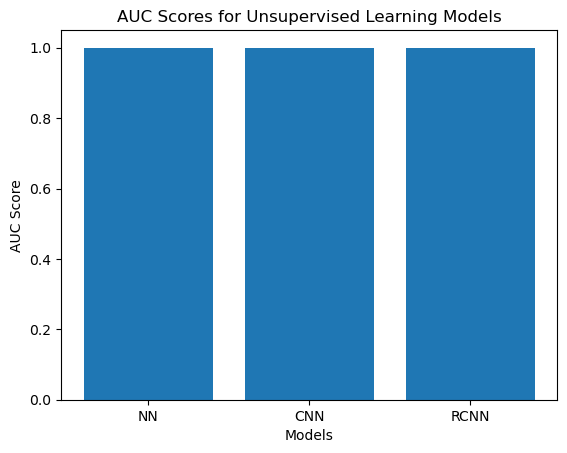

In [56]:
models = ['NN', 'CNN', 'RCNN']
auc_scores = [ roc_auc_nn, roc_auc_cnn, roc_auc_rcnn]

plt.bar(models, auc_scores)
plt.title('AUC Scores for Unsupervised Learning Models')
plt.xlabel('Models')
plt.ylabel('AUC Score')
plt.show()

## Accuracy for Unsupervised Learning Models

In [57]:
# Accuracy for Unsupervised Learning Models
print('Neural Network Accuracy:', accuracy_score(y_test, y_pred_nn))
print('CNN Accuracy:', accuracy_score(y_test, y_pred_cnn))
print('RCNN Accuracy:', accuracy_score(y_test, y_pred_rcnn))


Neural Network Accuracy: 0.9999429690321845
CNN Accuracy: 0.9999619793547897
RCNN Accuracy: 1.0
